In [1]:
import numpy as np
import pygrgl
import matplotlib.pyplot as plt 

from grg_pheno_sim.phenotype import sim_phenotypes
from grg_pheno_sim.model import grg_causal_mutation_model


The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct -p 10 -t 2 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

This notebook contains demos where we combine all the stages of the phenotype simulator together to obtain final phenotypes in one go. The first demo uses the normal model for univariate simulation.

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "normal"
mean = 0
var = 1

model = grg_causal_mutation_model(model_type, mean=mean, var=var)

num_causal = 1000

random_seed = 1

normalize_phenotype = True #set value to true to normalize the final phenotypes

normalize_genetic_values_before_noise = True

heritability = 0.33

effect_output_required = True #saves the effect sizes data for each mutation node in a .par file

effect_path = 'univariate_sample_effect_sizes.par'

standardized_output = True

output_path = 'normal_pheno_normalized.phen' #define the path to be saved at, this output is saved in the file of this name in the same directory

header=True #set header parameter to true if column names are expected in output file

phenotypes = sim_phenotypes(grg_1, model, num_causal, random_seed, normalize_phenotype=normalize_phenotype, normalize_genetic_values_before_noise=normalize_genetic_values_before_noise, heritability=heritability, save_effect_output=effect_output_required, effect_path=effect_path, standardized_output=standardized_output, path=output_path, header=header)


The initial effect sizes are 
     mutation_id  effect_size  causal_mutation_id
0             20    -1.810258                   0
1             28     1.151768                   0
2             62     1.681257                   0
3             76     2.346698                   0
4            119    -0.286668                   0
..           ...          ...                 ...
995        10862    -0.221163                   0
996        10874    -1.136983                   0
997        10879    -0.966133                   0
998        10883    -1.402602                   0
999        10889    -0.483777                   0

[1000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0     -16.501664                   0
1                1      -2.454348                   0
2                2     -17.303803                   0
3                3       6.641214                   0
4                4      -8.71021

In [4]:
phenotypes #normalized phenotypes

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.234035,-0.592203,-0.826238
1,0,1,0.427721,1.889781,2.317502
2,0,2,-0.271823,-0.937766,-1.209589
3,0,3,0.856206,-0.154167,0.702038
4,0,4,0.133013,0.747241,0.880254
...,...,...,...,...,...
195,0,195,1.133927,-0.154438,0.979489
196,0,196,1.322960,0.591262,1.914222
197,0,197,0.800730,0.417229,1.217960
198,0,198,0.512074,-0.058536,0.453538


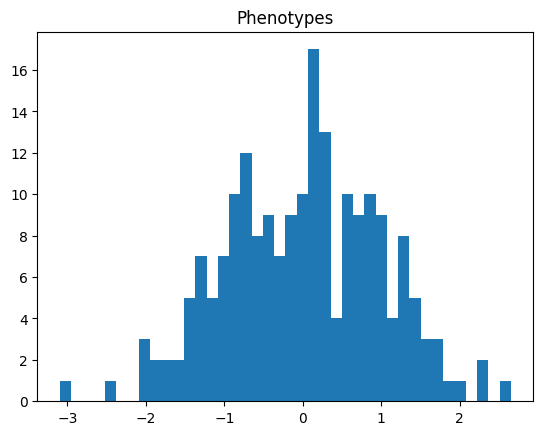

Mean of phenotypes: 3.3306690738754695e-17
Standard deviation of phenotypes: 1.0


In [5]:

plt.hist(phenotypes["phenotype"], bins=40)
plt.title("Phenotypes")
plt.show()
print("Mean of phenotypes: " + str(phenotypes['phenotype'].mean()))
print("Standard deviation of phenotypes: " + str(phenotypes['phenotype'].std()))

The demo above involved normalizing the phenotypes, which is clearly evident in the plot above since the phenotypes are normalized to have a mean of 0 and a standard deviation of 1. The demo below does not normalize the phenotypes (this is the default case since the normalize phenotype parameter has a default value set to False). The user should set this field to True if they wish to normalize the phenotypes.

In [6]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "normal"
mean = 0
var = 1

model = grg_causal_mutation_model(model_type, mean=mean, var=var)

num_causal = 1000

random_seed = 1

normalize_genetic_values_before_noise = True

heritability = 0.33

effect_output_required = True #saves the effect sizes data for each mutation node in a .par file

effect_path = 'univariate_sample_effect_sizes.par'

standardized_output = True

output_path = 'normal_pheno_unmodified.phen' #define the path to be saved at, this output is saved in the file of this name in the same directory

header=True #set header parameter to true if column names are expected in output file

phenotypes = sim_phenotypes(grg_1, model, num_causal, random_seed, normalize_genetic_values_before_noise=normalize_genetic_values_before_noise, heritability=heritability, save_effect_output=effect_output_required, effect_path=effect_path, standardized_output=standardized_output, path=output_path, header=header)


The initial effect sizes are 
     mutation_id  effect_size  causal_mutation_id
0             20    -1.810258                   0
1             28     1.151768                   0
2             62     1.681257                   0
3             76     2.346698                   0
4            119    -0.286668                   0
..           ...          ...                 ...
995        10862    -0.221163                   0
996        10874    -1.136983                   0
997        10879    -0.966133                   0
998        10883    -1.402602                   0
999        10889    -0.483777                   0

[1000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0     -16.501664                   0
1                1      -2.454348                   0
2                2     -17.303803                   0
3                3       6.641214                   0
4                4      -8.71021

In [7]:
phenotypes #non-normalized phenotypes

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.375568,1.274249,0.898681
1,0,1,0.686386,-0.060917,0.625469
2,0,2,-0.436209,1.230599,0.794390
3,0,3,1.373995,-1.329537,0.044458
4,0,4,0.213453,0.446982,0.660434
...,...,...,...,...,...
195,0,195,1.819668,0.207285,2.026954
196,0,196,2.123019,-2.338012,-0.214993
197,0,197,1.284972,-0.597119,0.687853
198,0,198,0.821750,-3.281447,-2.459697


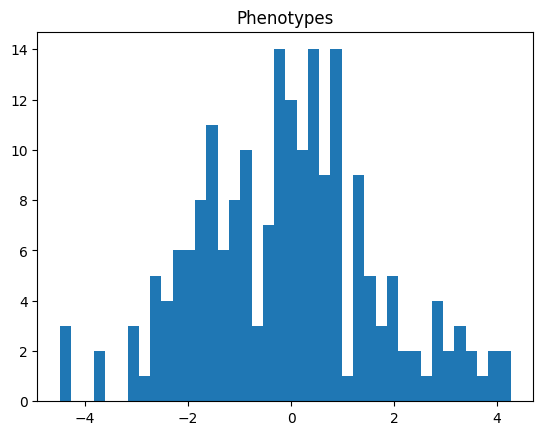

Mean of phenotypes: -0.08196766170943189
Standard deviation of phenotypes: 1.7343275966553928


In [8]:

plt.hist(phenotypes["phenotype"], bins=40)
plt.title("Phenotypes")
plt.show()
print("Mean of phenotypes: " + str(phenotypes['phenotype'].mean()))
print("Standard deviation of phenotypes: " + str(phenotypes['phenotype'].std()))

The second demo uses the multivariate normal for multivariate simulation.

In [9]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "multivariate normal"
means = np.zeros(2)
cov = np.array([[1, 0.25], [0.25, 1]])

model = grg_causal_mutation_model(model_type, mean=means, cov=cov)

num_causal = 10000

random_seed = 1

h2 = [0.4789, 0.5]

normalize_phenotype = True #set value to true to normalize the final phenotypes

effect_output_required = True #saves the effect sizes data for each mutation node in a .par file

effect_path = 'multi_sample_effect_sizes.par'

standardized_output=True

output_path = 'multi_normal_pheno.phen' #define the path you want it to be saved at, file of this name can be found in the same directory

phenotypes_multi_normal = sim_phenotypes(grg_1, model, num_causal, random_seed, normalize_phenotype=normalize_phenotype, heritability=h2, save_effect_output=effect_output_required, effect_path=effect_path, standardized_output=standardized_output, path=output_path)



The initial effect sizes are 
       mutation_id  effect_size  causal_mutation_id
0                0     0.519955                   0
1                0    -0.835345                   1
2                1    -0.132988                   0
3                1     0.588967                   1
4                2    -1.013731                   0
...            ...          ...                 ...
19995        10890    -1.440376                   1
19996        10891    -0.564984                   0
19997        10891     1.015028                   1
19998        10892    -0.251851                   0
19999        10892    -0.227234                   1

[20000 rows x 3 columns]


The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0       1.158837                   0
1                0      -3.663374                   1
2                1      27.248589                   0
3                1      14.443919                   1
4                2      60.766476                   0
..             ...            ...                 ...
395            197     -54.165110                   1
396            198      43.713410                   0
397            198     -10.539031                   1
398            199      31.813374                   0
399            199      25.525226                   1

[400 rows x 3 columns]


In [10]:
phenotypes_multi_normal

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.417057,0.896355,0.479298
1,1,0,-0.040491,-0.039200,-0.079691
2,0,1,0.071800,-0.742961,-0.671161
3,1,1,0.347896,0.929724,1.277620
4,0,2,0.699841,-0.229581,0.470260
...,...,...,...,...,...
395,1,197,-1.123716,0.455835,-0.667880
396,0,198,0.380309,0.921161,1.301471
397,1,198,-0.187969,-0.617147,-0.805116
398,0,199,0.157332,-0.117089,0.040243


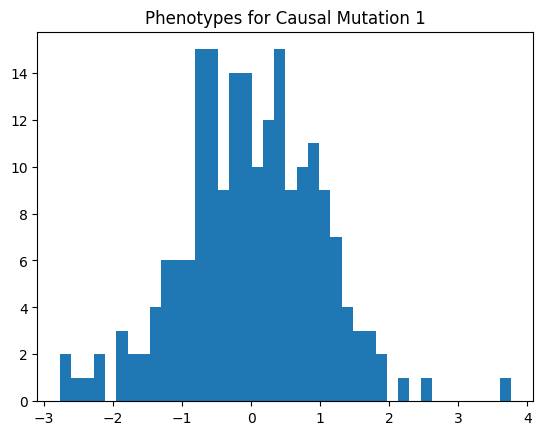

Mean of phenotypes: 7.105427357601002e-17
Standard deviation of phenotypes: 1.0


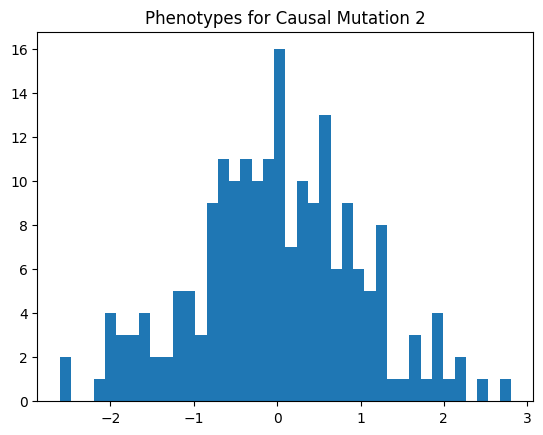

Mean of phenotypes: 0.0
Standard deviation of phenotypes: 1.0


In [11]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in phenotypes_multi_normal.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["phenotype"], bins=40)
  plt.title("Phenotypes for Causal Mutation " + str(i+1))
  plt.show()
  print("Mean of phenotypes: " + str(temp_df['phenotype'].mean()))
  print("Standard deviation of phenotypes: " + str(temp_df['phenotype'].std()))

In [12]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory

model_type = "multivariate normal"
means = np.zeros(2)
cov = np.array([[1, 0.33], [0.33, 1]])

model = grg_causal_mutation_model(model_type, mean=means, cov=cov)

num_causal = 10000

normalize_phenotype = True #set value to true to normalize the final phenotypes

random_seed = 1

mean = np.array([0,0])
user_cov = np.array([[1, 0.25], [0.25, 1]])

#heritability feature not used, user-defined noise simulated instead

#by default, a standardized version of the phenotype output will not be saved

phenotypes_multi_normal_non_h2 = sim_phenotypes(grg_1, model, num_causal, random_seed, normalize_phenotype=normalize_phenotype, user_mean=mean, user_cov=user_cov, normalize_genetic_values_after=True)



The initial effect sizes are 
       mutation_id  effect_size  causal_mutation_id
0                0     0.477827                   0
1                0    -0.803153                   1
2                1    -0.106011                   0
3                1     0.576354                   1
4                2    -0.954482                   0
...            ...          ...                 ...
19995        10890    -1.462889                   1
19996        10891    -0.514574                   0
19997        10891     0.978795                   1
19998        10892    -0.258722                   0
19999        10892    -0.235455                   1

[20000 rows x 3 columns]
The genetic values of the individuals are 
     individual_id  genetic_value  causal_mutation_id
0                0       0.987169                   0
1                0      -3.570608                   1
2                1      27.554240                   0
3                1      15.451738                   1
4      

In [13]:
phenotypes_multi_normal_non_h2

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.624408,0.009490,-0.614917
1,1,0,-0.081600,0.016649,-0.064951
2,0,1,0.126902,0.053608,0.180510
3,1,1,0.467543,-0.050501,0.417043
4,0,2,1.020100,-0.028410,0.991689
...,...,...,...,...,...
395,1,197,-1.520949,0.026984,-1.493965
396,0,198,0.556589,0.001446,0.558035
397,1,198,-0.224739,-0.038085,-0.262824
398,0,199,0.268015,0.026225,0.294240
